# <a href="https://girafe.ai/" target="_blank" rel="noopener noreferrer"><img src="https://raw.githubusercontent.com/girafe-ai/ml-course/7096a5df4cada5ee651be1e3215c2f7fb8a7e0bf/logo_margin.svg" alt="girafe-ai logo" width="150px" align="left"></a> [ml-basic course](https://github.com/girafe-ai/ml-course) <a class="tocSkip">

# Lab assignment №1, part 2

This lab assignment consists of several parts.

In this part you will work with SVM algorithm and it's kernels.

Several comments:
* Don't hesitate to ask questions in a chat, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

##  1. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons

Let's generate our dataset and take a look on it.

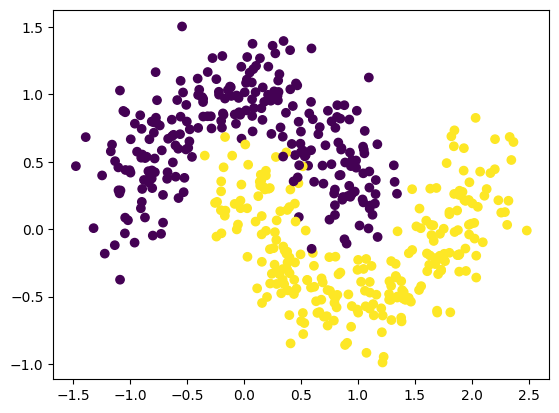

In [2]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models

First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

* train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded)
* plot their decision regions
* calculate preffered classification metrics.
* describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and plot with matplotlib yourself or use [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

In [ ]:
from mlxtend.plotting import plot_decision_regions
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import f1_score


lr = LogisticRegression(
    penalty='l2',
    C=1.0,
    max_iter=500
)
svm = SVC(
    kernel="linear",
    C=1.0,
)

In [8]:
lr.fit(moons_points, moons_labels)
svm.fit(moons_points, moons_labels)

y_preds_lr = lr.predict(moons_points)
y_preds_svm = svm.predict(moons_points)

accuracy_lr = np.mean(y_preds_lr == moons_labels)
accuracy_svm = np.mean(y_preds_svm == moons_labels)

f1_lr = f1_score(moons_labels, y_preds_lr)
f1_svm = f1_score(moons_labels, y_preds_svm)

print(f"Logistic Regression - Accuracy: {accuracy_lr:.4f}, F1 Score: {f1_lr:.4f}")
print(f"SVM - Accuracy: {accuracy_svm:.4f}, F1 Score: {f1_svm:.4f}")

Logistic Regression - Accuracy: 0.8560, F1 Score: 0.8554
SVM - Accuracy: 0.8580, F1 Score: 0.8566


In [11]:
def plot_decisions(X, y, clf, ax, title=""):
    plot_decision_regions(X=X, y=y, clf=clf, ax=ax, legend=0)
    ax.set_title(title)
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")

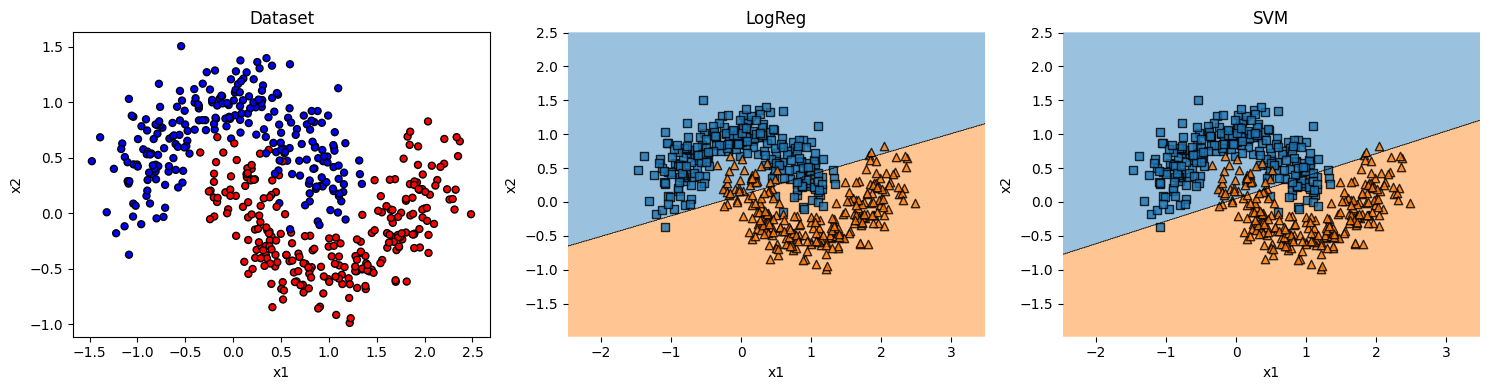

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].scatter(moons_points[:, 0], moons_points[:, 1],
                c=moons_labels, cmap="bwr", edgecolors="k", s=25)
axes[0].set_title("Dataset")
axes[0].set_xlabel("x1")
axes[0].set_ylabel("x2")

plot_decisions(
    moons_points,
    moons_labels,
    lr,
    axes[1],
    title=f"LogReg"
)

plot_decisions(
    moons_points,
    moons_labels,
    svm,
    axes[2],
    title=f"SVM"
)

plt.tight_layout()
plt.show()

Сложно что-то сказать про разницу в моделях. Даже по метрикам они почти не отличаются. В данном случае обе модели показывают "предел" возможности линейных моделей на этих данных.

## 1.2 Kernel tirck

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel
* estimate optimal params (with a few manual trials)
* plot decision regions
* calculate metrics you've chosen eariler

In [20]:
def evaluate_model(model, X, y):
    model.fit(X, y)
    y_pred = model.predict(X)
    acc = np.mean(y_pred == y)
    f1 = f1_score(y, y_pred)
    return acc, f1, model

best_models = {} 

param_grid = {
    "poly": [
        {"C": 0.5, "degree": 2, "gamma": "scale", "coef0": 0.0},
        {"C": 1.0, "degree": 3, "gamma": "scale", "coef0": 0.0},
        {"C": 1.0, "degree": 4, "gamma": 0.5, "coef0": 1.0},
        {"C": 5.0, "degree": 3, "gamma": 0.5, "coef0": 1.0},
    ],
    "rbf": [
        {"C": 0.5, "gamma": "scale"},
        {"C": 1.0, "gamma": "scale"},
        {"C": 5.0, "gamma": 0.5},
        {"C": 1.0, "gamma": 0.5},
    ],
    "sigmoid": [
        {"C": 0.5, "gamma": "scale", "coef0": 0.0},
        {"C": 1.0, "gamma": "scale", "coef0": 0.0},
        {"C": 1.0, "gamma": 0.5, "coef0": 1.0},
        {"C": 5.0, "gamma": 0.5, "coef0": 1.0},
    ],
}

for kernel, configs in param_grid.items():
    best_f1 = -1.0
    best_acc = None
    best_clf = None
    best_params = None

    for params in configs:
        clf = SVC(kernel=kernel, **params)
        acc, f1, clf = evaluate_model(clf, moons_points, moons_labels)
        if f1 > best_f1:
            best_f1 = f1
            best_acc = acc
            best_clf = clf
            best_params = params

    best_models[kernel] = {
        "clf": best_clf,
        "f1": best_f1,
        "acc": best_acc,
        "params": best_params,
    }


Kernel: poly
  best params: {'C': 1.0, 'degree': 4, 'gamma': 0.5, 'coef0': 1.0}
  Accuracy: 0.9740, F1: 0.9738

Kernel: rbf
  best params: {'C': 1.0, 'gamma': 'scale'}
  Accuracy: 0.9740, F1: 0.9738

Kernel: sigmoid
  best params: {'C': 1.0, 'gamma': 0.5, 'coef0': 1.0}
  Accuracy: 0.6920, F1: 0.7061



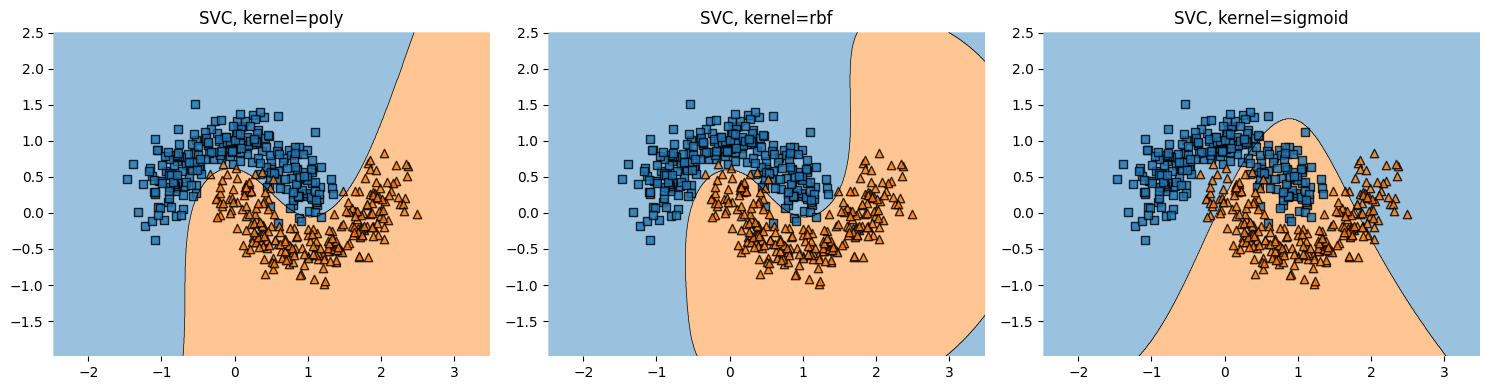

In [36]:
for kernel, info in best_models.items():
    print(f"Kernel: {kernel}")
    print(f"  best params: {info['params']}")
    print(f"  Accuracy: {info['acc']:.4f}, F1: {info['f1']:.4f}")
    print()


fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for ax, kernel in zip(axes, ["poly", "rbf", "sigmoid"]):
    info = best_models[kernel]
    clf = info["clf"]
    acc = info["acc"]
    f1 = info["f1"]
    title = f"SVC, kernel={kernel}"

    plot_decision_regions(X=moons_points, y=moons_labels, clf=clf, ax=ax, legend=0)
    ax.set_title(title)

plt.tight_layout()
plt.show()

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

Качество сильно возрасло в случае полиномиального и rbf ядер. Сигмойда тут вообще не справляется, а вот остальные очень даже хорошо. Очень солидные метрики получились, с учетом рукомахательного составленрия сетки гиперпараметров. Degree получил по лучшему результату f1. Мог бы и по аккурасси, но разницы в данном случае точно не будет.

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

In [22]:
from sklearn.preprocessing import PolynomialFeatures

In [31]:
degree = 3 # tried 2, 4 and 5.
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_poly = poly.fit_transform(moons_points)

logreg_poly = LogisticRegression(
    penalty='l2',
    C=1.0,
    max_iter=500
)
logreg_poly.fit(X_poly, moons_labels)
y_pred_poly = logreg_poly.predict(X_poly)

acc_poly = np.mean(y_pred_poly == moons_labels)
f1_poly = f1_score(moons_labels, y_pred_poly)

print(f"Poly LR (degree={degree}) - acc={acc_poly:.4f}, f1={f1_poly:.4f}")


Poly LR (degree=3) - acc=0.9680, f1=0.9680


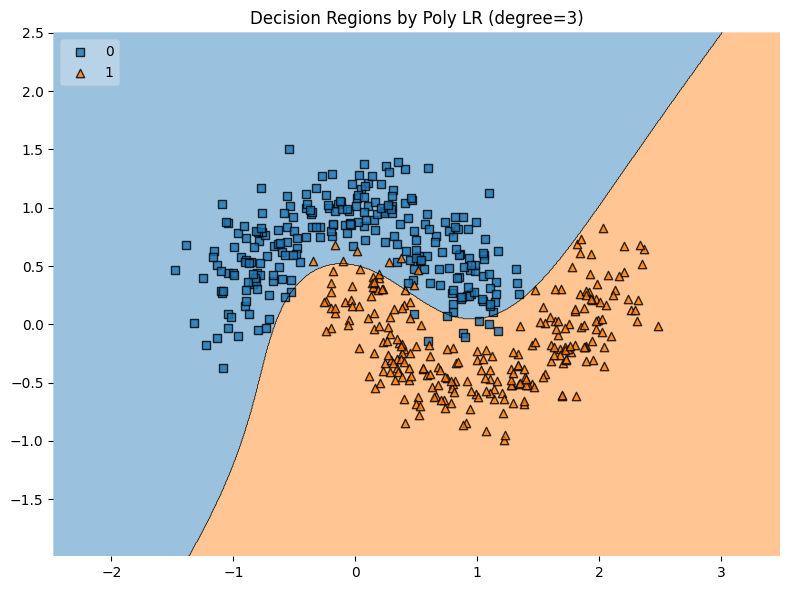

In [35]:
class PolyWrapper:
    def __init__(self, model, poly):
        self.model = model
        self.poly = poly
        self.classes_ = model.classes_

    def predict(self, X_in):
        X_poly_in = self.poly.transform(X_in)
        return self.model.predict(X_poly_in)

wrapped_poly = PolyWrapper(logreg_poly, poly)

plt.figure(figsize=(8, 6))
plot_decision_regions(X=moons_points, y=moons_labels, clf=wrapped_poly, legend=2)
plt.title(f"Decision Regions by Poly LR (degree={degree})")
plt.tight_layout()
plt.show()

Тоже очень хорошо справилась модель. Метрики почти такие же как и у svm с полином ядром. Учитывая, что логрег остается линейной моделью, то результат чуть ли не заставляет впечатлиться. Параметр использовал тройку. Можно было бы и взять побольше, но дальше прирост уже сильно меньше. Кстати, когда я проверял степень 4 (такая же как у SVM), то метрики полусились почти один в один с полином svm. Здорово.

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

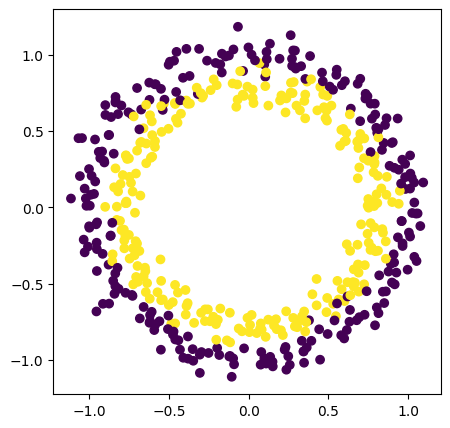

In [37]:
from sklearn.datasets import make_circles


circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

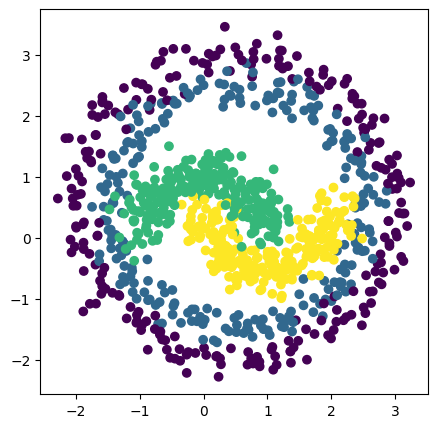

In [38]:
points = np.vstack((circles_points * 2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2))  # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

On that harder problem compare SVM and Gradient boosting.

Tune GB (manually ok), then SVM with appropriate kernel of your choice.

Again plot decision regions, calculate metrics.

Justify the results in a few phrases.

In [46]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

In [72]:
svm = SVC(
    kernel="poly",
    C=1.0,
    gamma=0.5,
    coef0=1.0,
    degree=4,
)
svm.fit(points, labels)
y_pred_svm = svm.predict(points)

acc_svm = accuracy_score(labels, y_pred_svm)
f1_svm = f1_score(labels, y_pred_svm, average='weighted')


gb = GradientBoostingClassifier(
    n_estimators=500,
    learning_rate=0.1,
    max_depth=1
)
gb.fit(points, labels)
y_pred_gb = gb.predict(points)

acc_gb = accuracy_score(labels, y_pred_gb)
f1_gb = f1_score(labels, y_pred_gb, average="weighted")


print(f"SVM Poly: accuracy={acc_svm:.4f}, F1={f1_svm:.4f}")
print(f"Gradient Boosting: accuracy={acc_gb:.4f}, F1={f1_gb:.4f}")

SVM Poly: accuracy=0.9420, F1=0.9421
Gradient Boosting: accuracy=0.9470, F1=0.9469


In [68]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

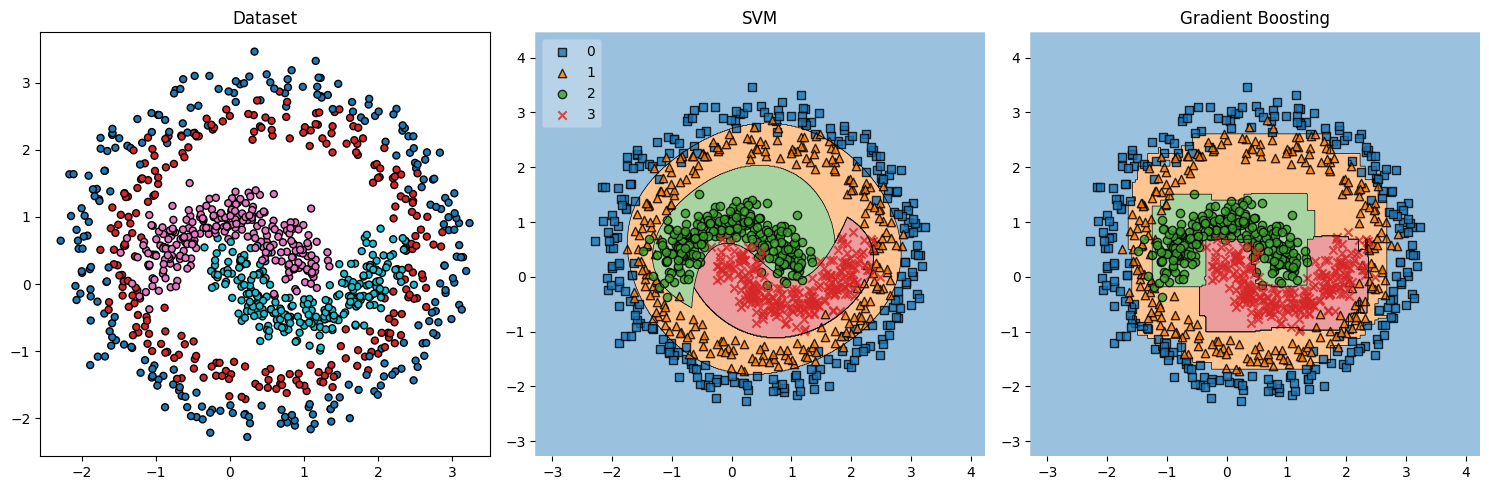

In [73]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].scatter(points[:, 0], points[:, 1], c=labels, cmap="tab10", edgecolors="k", s=25)
axes[0].set_title("Dataset")

plot_decision_regions(
    X=points,
    y=labels,
    clf=svm,
    ax=axes[1],
    legend=2
)
axes[1].set_title(f"SVM")

plot_decision_regions(
    X=points,
    y=labels,
    clf=gb,
    ax=axes[2],
    legend=0
)
axes[2].set_title(f"Gradient Boosting")

plt.tight_layout()
plt.show()

Град бустинг, как мы понимаем, это вообще машина страшная для такой задачи, поэтому покрутив гиперпараметры немного, там почти сразу вылазят единичные метрики. Не смотря на это, svm с полином ядром тоже очень хорошо себя показал. Подобрал гиперпараметры бустинга так, чтобы метрики были примерно на одном уровне. Лично мне график решения svm нравится больше за счет гладкости границ.